In [40]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
import numpy as np

Some of the transactions are labelled as fraud; you'll treat these labels as given and will use those to validate the results.

In [4]:
df = pd.read_csv('chapter_3/banksim.csv')

In [5]:
df.shape

(7200, 6)

In [7]:
df.head(5)

,Unnamed: 0,age,gender,category,amount,fraud
0,171915,3,F,es_transportation,49.71,0
1,426989,4,F,es_health,39.29,0
2,310539,3,F,es_transportation,18.76,0
3,215216,4,M,es_transportation,13.95,0
4,569244,2,M,es_transportation,49.87,0


In [11]:
df.groupby('fraud').count()

,Unnamed: 0,age,gender,category,amount
fraud,,,,,
0,7000,7000,7000,7000,7000
1,200,200,200,200,200


In [8]:
#Group by categories and take the mean
df.groupby('category').mean()

,Unnamed: 0,amount,fraud
category,,,
es_barsandrestaurants,267372.707865,43.841793,0.022472
es_contents,335906.153846,55.170000,0.000000
es_fashion,286952.226804,59.780769,0.020619
es_food,334978.976190,35.216050,0.000000
es_health,335355.176955,126.604704,0.242798
es_home,248312.583333,120.688317,0.208333
es_hotelservices,280138.548387,172.756245,0.548387
es_hyper,244440.712500,46.788180,0.125000
es_leisure,186541.307692,229.757600,1.000000


the majority of fraud is observed in travel, leisure and sports related transaction

# Customer Segmentation
1. check whether there is obvious patterns for clients in data
2. Whether data is homogeneous in each group

In [12]:
df.groupby('age').mean()

,Unnamed: 0,amount,fraud
age,,,
0,327520.450000,49.468935,0.050000
1,290985.509116,35.622829,0.026648
2,296867.958851,37.228665,0.028718
3,291471.417346,37.279338,0.023283
4,306041.396403,36.197985,0.035966
5,290885.960859,37.547521,0.023990
6,299193.716561,36.700852,0.022293
U,288372.181818,39.117000,0.000000


In [17]:
df['age'].value_counts()

2    2333
3    1718
4    1279
5     792
1     713
6     314
0      40
U      11
Name: age, dtype: int64

as you can see the average amount spent as well as fraud occurrence is rather similar across groups.

Although age group '0' is indeed a bit different from the rest, only 40 cases in the entire dataset fall in this category, so it would not be feasible to split these out into a seperate group and run a model on that amount of observations. You have to keep in mind that you need to train the model seperately on each segment, so in this case it would not be possible.

In [19]:
df_fraud = df.loc[df['fraud'] == 1]
df_non_fraud = df.loc[df['fraud'] == 0]
df_non_fraud

,Unnamed: 0,age,gender,category,amount,fraud
0,171915,3,F,es_transportation,49.7100,0
1,426989,4,F,es_health,39.2900,0
2,310539,3,F,es_transportation,18.7600,0
3,215216,4,M,es_transportation,13.9500,0
4,569244,2,M,es_transportation,49.8700,0
5,153631,4,F,es_hyper,57.8200,0
6,290621,5,F,es_transportation,27.2600,0
7,78537,2,F,es_transportation,7.6100,0
8,56239,4,M,es_transportation,42.0100,0
9,562564,2,F,es_transportation,21.0800,0


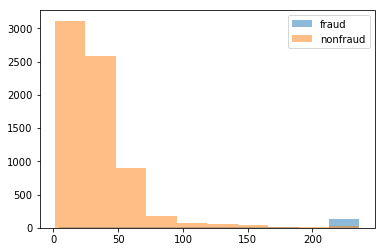

In [25]:
# Plot histograms of the amounts in fraud and non-fraud data
plt.hist(df_fraud.amount, alpha = 0.5, label = 'fraud')
plt.hist(df_non_fraud.amount, alpha = 0.5, label = 'nonfraud')
plt.legend()
plt.show()

In [39]:
#Encoding categorical data
labelencode_df_1 = LabelEncoder()
labelencode_df_2 = LabelEncoder()
df.iloc[:,2] = labelencode_df_1.fit_transform(df.iloc[:,2])
df.iloc[:,3] = labelencode_df_2.fit_transform(df.iloc[:,3])
df

,Unnamed: 0,age,gender,category,amount,fraud
0,171915,3,1,12,49.7100,0
1,426989,4,1,4,39.2900,0
2,310539,3,1,12,18.7600,0
3,215216,4,2,12,13.9500,0
4,569244,2,2,12,49.8700,0
5,153631,4,1,7,57.8200,0
6,290621,5,1,12,27.2600,0
7,78537,2,1,12,7.6100,0
8,56239,4,2,12,42.0100,0
9,562564,2,1,12,21.0800,0


In [49]:
onehotencoder = OneHotEncoder(categorical_features=[2,3])

In [55]:
df = onehotencoder.fit_transform(df).toarray()
df

ValueError: could not convert string to float: 'U'